Mean Absolute Error: 475.99528383594463
Mean Squared Error: 1302564.312325739
R^2 Score: 0.9943200417491832


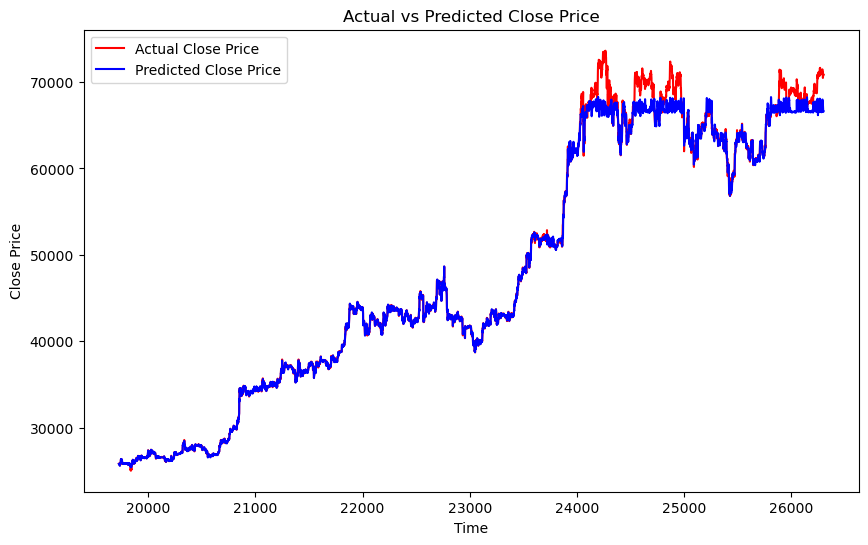

Predicted Close Price for the Next Hour: 66616.9453125


In [99]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib

# Step 1: Load Data from CSV (hourly data)
file_path = '/Users/noraizabid/Desktop/Dissertation Algos/XGboost/BTCUSD_1h_2021_to_2024_cleaned.csv'
data = pd.read_csv(file_path)

# Convert the time column to datetime (using the correct format)
data['time'] = pd.to_datetime(data['time'], format='%Y-%m-%d %H:%M:%S')
data = data.sort_values('time')

# Step 2: Prepare the data for XGBoost
# We will create lag features to predict the next hour's 'close' price based on previous 'open', 'high', 'low', 'close', and 'volume' data.

# Creating lag features
for lag in range(1, 8):
    data[f'lag_{lag}_close'] = data['close'].shift(lag)
    data[f'lag_{lag}_open'] = data['open'].shift(lag)
    data[f'lag_{lag}_high'] = data['high'].shift(lag)
    data[f'lag_{lag}_low'] = data['low'].shift(lag)
    data[f'lag_{lag}_volume'] = data['volume'].shift(lag)

# Dropping rows with NaN values that were created due to lagging
data = data.dropna()

# Features and target
X = data.drop(columns=['time'])  # Keep 'close' in the features
y = data['close']  # Target variable (next hour's closing price)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=False, random_state=42)

# Step 4: Train XGBoost Model
model = XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=7, subsample=0.8, colsample_bytree=0.8)
model.fit(X_train, y_train)

# Step 5: Make Predictions on the Test Set
y_pred = model.predict(X_test)

# Step 6: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Close Price', color='red')
plt.plot(y_test.index, y_pred, label='Predicted Close Price', color='blue')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.show()

# Save the model using joblib
model_filename = 'xgboost_model_btc_1h.pkl'
joblib.dump(model, model_filename)

# Step 7: Real-Time Prediction using the last 7 hours of data
# Use the last 7 hours of the test data for prediction
last_7_hours_df = X_test.tail(7).copy()

# Predict the next hour's price
next_hour_prediction = model.predict(last_7_hours_df)
print(f'Predicted Close Price for the Next Hour: {next_hour_prediction[-1]}')


Mean Absolute Error: 378.13561613175665
Mean Squared Error: 361883.3639654183
R^2 Score: 0.9813254073633462


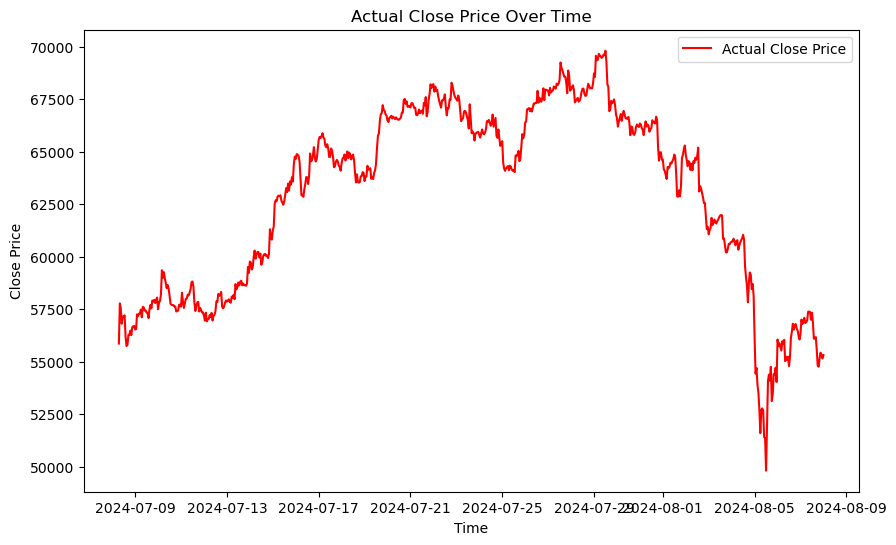

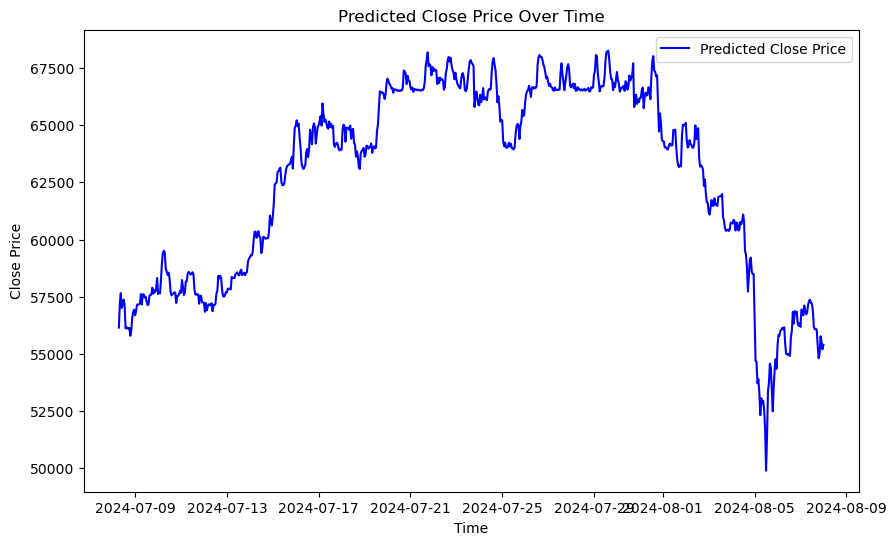

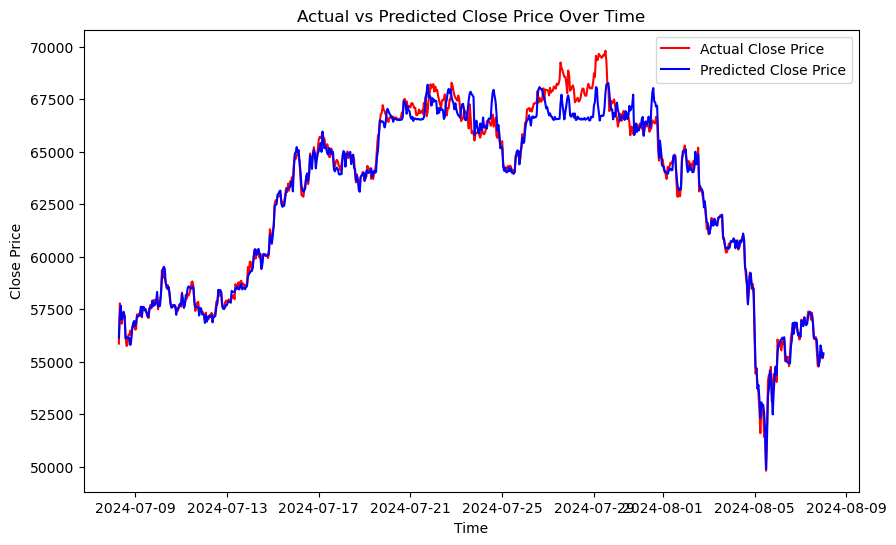

In [101]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib

# Step 1: Load the saved model
model_filename = 'xgboost_model_btc_1h.pkl'
loaded_model = joblib.load(model_filename)

# Step 2: Load Data from CSV (hourly data)
file_path = '/Users/noraizabid/Desktop/Dissertation Algos/XGboost/BTCUSD_1h_testing.csv'
data = pd.read_csv(file_path)

# Convert the time column to datetime (using the correct format)
data['time'] = pd.to_datetime(data['time'], format='%Y-%m-%d %H:%M:%S')
data = data.sort_values('time')

# Step 3: Prepare the data for prediction
# Recreate the lag features just like in the previous script
for lag in range(1, 8):
    data[f'lag_{lag}_close'] = data['close'].shift(lag)
    data[f'lag_{lag}_open'] = data['open'].shift(lag)
    data[f'lag_{lag}_high'] = data['high'].shift(lag)
    data[f'lag_{lag}_low'] = data['low'].shift(lag)
    data[f'lag_{lag}_volume'] = data['volume'].shift(lag)

# Drop rows with NaN values that were created due to lagging
data = data.dropna()

# Features and target (use only test data)
X_test = data.drop(columns=['time'])  # Keep 'close' in the features
y_test = data['close']  # Actual values

# Step 4: Make Predictions using the loaded model
y_pred = loaded_model.predict(X_test)

# Step 5: Evaluate the Model (again, but using the loaded model)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Step 6: Visualization

# 1. Actual Data Plot over time
plt.figure(figsize=(10, 6))
plt.plot(data['time'].iloc[-len(y_test):], y_test, label='Actual Close Price', color='red')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Actual Close Price Over Time')
plt.legend()
plt.show()

# 2. Predicted Data Plot over time
plt.figure(figsize=(10, 6))
plt.plot(data['time'].iloc[-len(y_pred):], y_pred, label='Predicted Close Price', color='blue')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Predicted Close Price Over Time')
plt.legend()
plt.show()

# 3. Combined Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.plot(data['time'].iloc[-len(y_test):], y_test, label='Actual Close Price', color='red')
plt.plot(data['time'].iloc[-len(y_pred):], y_pred, label='Predicted Close Price', color='blue')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price Over Time')
plt.legend()
plt.show()


Mean Absolute Error: 4.4892491090018485
Mean Squared Error: 44.548167909845546
R^2 Score: 0.9999175577953756


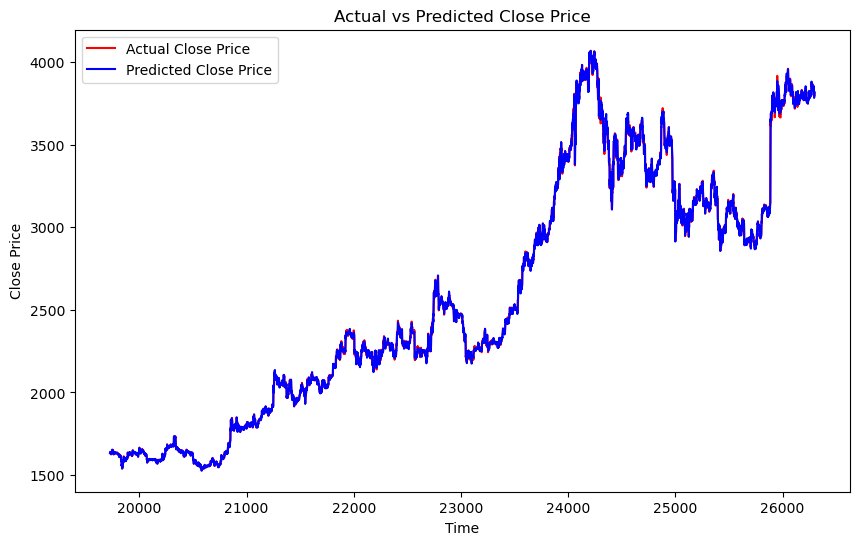

Predicted Close Price for the Next Hour: 3817.515380859375


In [103]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib

# Step 1: Load Data from CSV (hourly data)
file_path = '/Users/noraizabid/Desktop/Dissertation Algos/XGboost/ETHUSD_1h_2021_to_2024_cleaned.csv'
data = pd.read_csv(file_path)

# Convert the time column to datetime (using the correct format)
data['time'] = pd.to_datetime(data['time'], format='%d/%m/%Y %H:%M')
data = data.sort_values('time')

# Step 2: Prepare the data for XGBoost
# We will create lag features to predict the next hour's 'close' price based on previous 'open', 'high', 'low', 'close', and 'volume' data.

# Creating lag features
for lag in range(1, 8):
    data[f'lag_{lag}_close'] = data['close'].shift(lag)
    data[f'lag_{lag}_open'] = data['open'].shift(lag)
    data[f'lag_{lag}_high'] = data['high'].shift(lag)
    data[f'lag_{lag}_low'] = data['low'].shift(lag)
    data[f'lag_{lag}_volume'] = data['volume'].shift(lag)

# Dropping rows with NaN values that were created due to lagging
data = data.dropna()

# Features and target
X = data.drop(columns=['time'])  # Keep 'close' in the features
y = data['close']  # Target variable (next hour's closing price)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=False, random_state=42)

# Step 4: Train XGBoost Model
model = XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=7, subsample=0.8, colsample_bytree=0.8)
model.fit(X_train, y_train)

# Step 5: Make Predictions on the Test Set
y_pred = model.predict(X_test)

# Step 6: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Close Price', color='red')
plt.plot(y_test.index, y_pred, label='Predicted Close Price', color='blue')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.show()

# Save the model using joblib
model_filename = 'xgboost_model_eth_1h.pkl'
joblib.dump(model, model_filename)

# Step 7: Real-Time Prediction using the last 7 hours of data
# Use the last 7 hours of the test data for prediction
last_7_hours_df = X_test.tail(7).copy()

# Predict the next hour's price
next_hour_prediction = model.predict(last_7_hours_df)
print(f'Predicted Close Price for the Next Hour: {next_hour_prediction[-1]}')


In [ ]:
eth 1 d

Mean Absolute Error: 12.385942990928342
Mean Squared Error: 302.5289749323123
R^2 Score: 0.9994402092000738


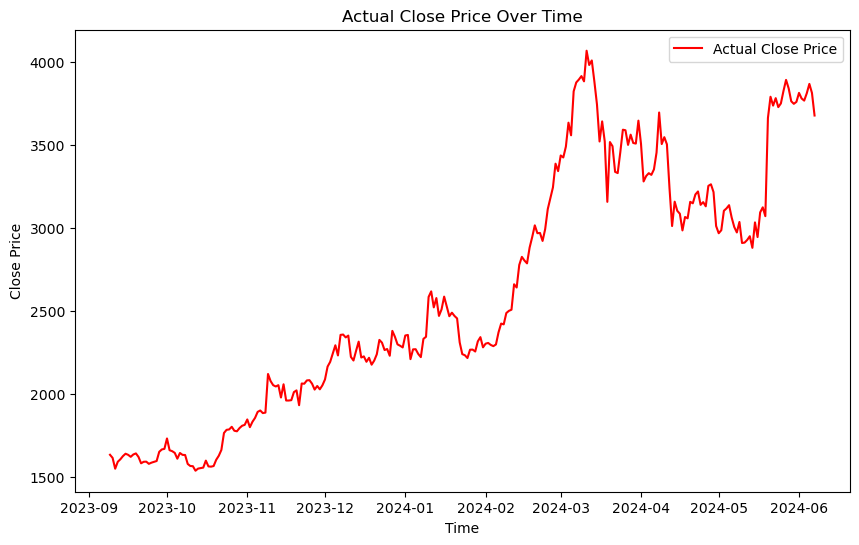

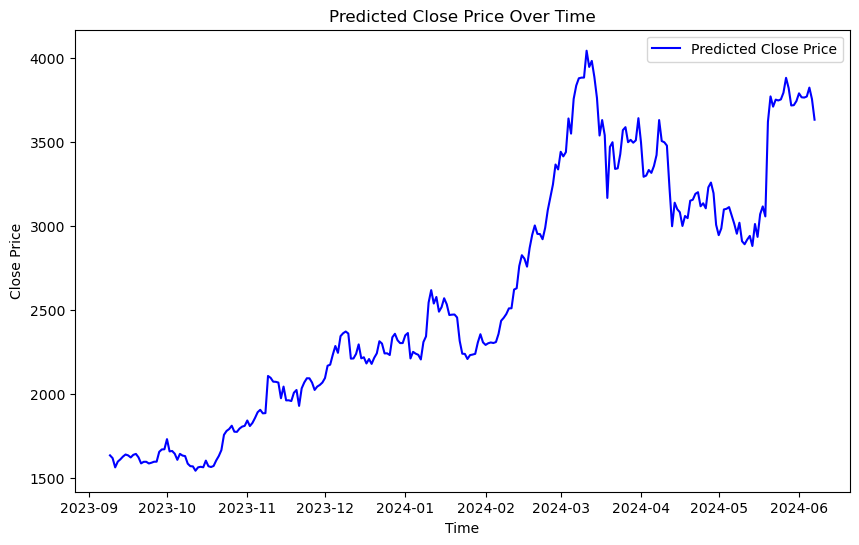

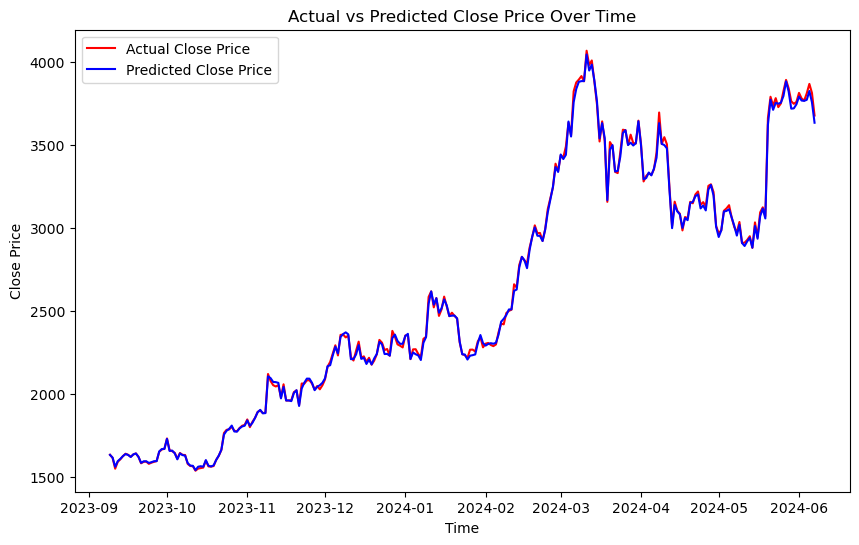

Predicted Close Price for the Next Day: 3632.900390625


In [107]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib

# Step 1: Load Data from CSV (daily data)
file_path = '/Users/noraizabid/Desktop/Dissertation Algos/XGboost/ETH-USD_1d_2021_to_2024_cleaned.csv'
data = pd.read_csv(file_path)

# Convert the time column to datetime (using the correct format)
# Assuming the time column is in 'YYYY-MM-DD' format without time component
data['time'] = pd.to_datetime(data['time'], format='%Y-%m-%d')
data = data.sort_values('time')

# Step 2: Prepare the data for XGBoost
# We will create lag features to predict the next day's 'close' price based on previous 'open', 'high', 'low', 'close', and 'volume' data.

# Creating lag features
for lag in range(1, 8):
    data[f'lag_{lag}_close'] = data['close'].shift(lag)
    data[f'lag_{lag}_open'] = data['open'].shift(lag)
    data[f'lag_{lag}_high'] = data['high'].shift(lag)
    data[f'lag_{lag}_low'] = data['low'].shift(lag)
    data[f'lag_{lag}_volume'] = data['volume'].shift(lag)

# Dropping rows with NaN values that were created due to lagging
data = data.dropna()

# Features and target
X = data.drop(columns=['time'])  # Keep 'close' in the features
y = data['close']  # Target variable (next day's closing price)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=False, random_state=42)

# Step 4: Train XGBoost Model
model = XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=7, subsample=0.8, colsample_bytree=0.8)
model.fit(X_train, y_train)

# Step 5: Make Predictions on the Test Set
y_pred = model.predict(X_test)

# Step 6: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Step 6: Visualization

# 1. Actual Data Plot over time
plt.figure(figsize=(10, 6))
plt.plot(data['time'].iloc[-len(y_test):], y_test, label='Actual Close Price', color='red')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Actual Close Price Over Time')
plt.legend()
plt.show()

# 2. Predicted Data Plot over time
plt.figure(figsize=(10, 6))
plt.plot(data['time'].iloc[-len(y_pred):], y_pred, label='Predicted Close Price', color='blue')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Predicted Close Price Over Time')
plt.legend()
plt.show()

# 3. Combined Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.plot(data['time'].iloc[-len(y_test):], y_test, label='Actual Close Price', color='red')
plt.plot(data['time'].iloc[-len(y_pred):], y_pred, label='Predicted Close Price', color='blue')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price Over Time')
plt.legend()
plt.show()

# Save the model using joblib
model_filename = 'xgboost_model_eth_1d.pkl'
joblib.dump(model, model_filename)

# Step 7: Real-Time Prediction using the last 7 days of data
# Use the last 7 days of the test data for prediction
last_7_days_df = X_test.tail(7).copy()

# Predict the next day's price
next_day_prediction = model.predict(last_7_days_df)
print(f'Predicted Close Price for the Next Day: {next_day_prediction[-1]}')


In [ ]:
eth 1 d

Mean Absolute Error: 12.385942990928342
Mean Squared Error: 302.5289749323123
R^2 Score: 0.9994402092000738


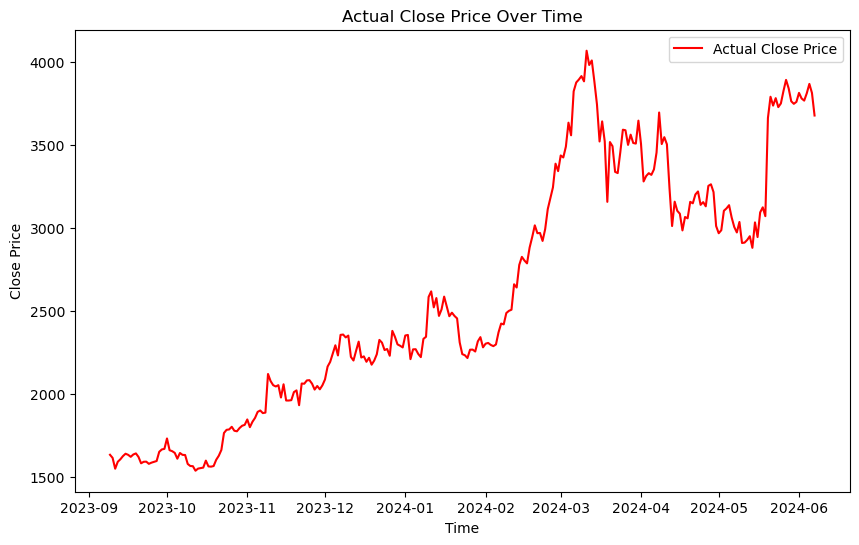

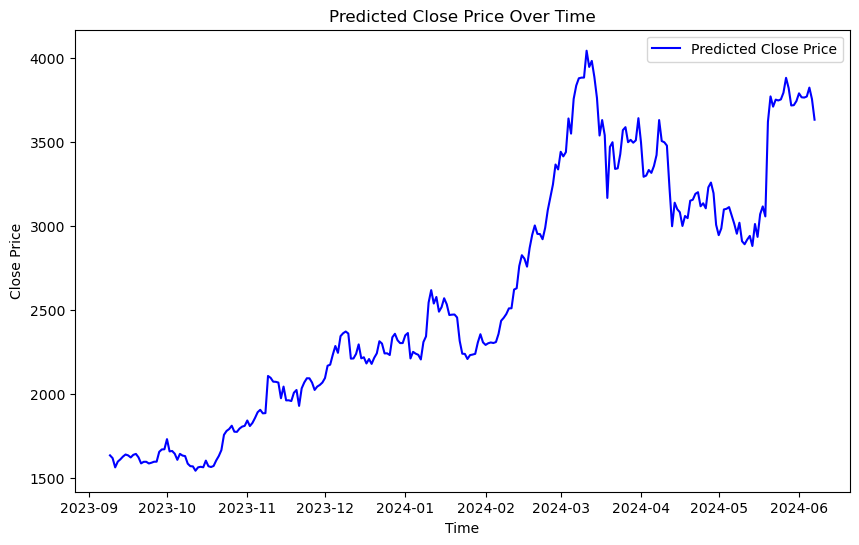

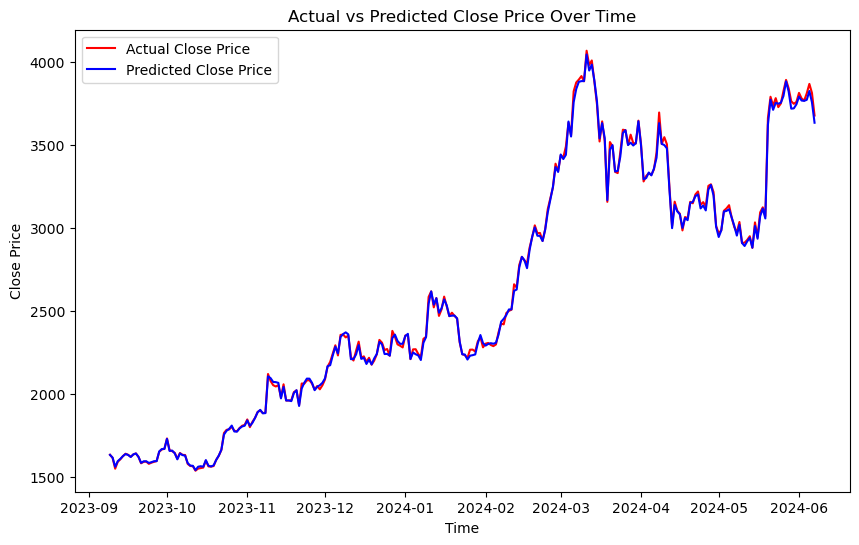

Predicted Close Price for the Next Day: 3632.900390625


In [109]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib

# Step 1: Load Data from CSV (daily data)
file_path = '/Users/noraizabid/Desktop/Dissertation Algos/XGboost/ETH-USD_1d_2021_to_2024_cleaned.csv'
data = pd.read_csv(file_path)

# Convert the time column to datetime (using the correct format)
# Assuming the time column is in 'YYYY-MM-DD' format without time component
data['time'] = pd.to_datetime(data['time'], format='%Y-%m-%d')
data = data.sort_values('time')

# Step 2: Prepare the data for XGBoost
# We will create lag features to predict the next day's 'close' price based on previous 'open', 'high', 'low', 'close', and 'volume' data.

# Creating lag features
for lag in range(1, 8):
    data[f'lag_{lag}_close'] = data['close'].shift(lag)
    data[f'lag_{lag}_open'] = data['open'].shift(lag)
    data[f'lag_{lag}_high'] = data['high'].shift(lag)
    data[f'lag_{lag}_low'] = data['low'].shift(lag)
    data[f'lag_{lag}_volume'] = data['volume'].shift(lag)

# Dropping rows with NaN values that were created due to lagging
data = data.dropna()

# Features and target
X = data.drop(columns=['time'])  # Keep 'close' in the features
y = data['close']  # Target variable (next day's closing price)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=False, random_state=42)

# Step 4: Train XGBoost Model
model = XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=7, subsample=0.8, colsample_bytree=0.8)
model.fit(X_train, y_train)

# Step 5: Make Predictions on the Test Set
y_pred = model.predict(X_test)

# Step 6: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Step 6: Visualization

# 1. Actual Data Plot over time
plt.figure(figsize=(10, 6))
plt.plot(data['time'].iloc[-len(y_test):], y_test, label='Actual Close Price', color='red')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Actual Close Price Over Time')
plt.legend()
plt.show()

# 2. Predicted Data Plot over time
plt.figure(figsize=(10, 6))
plt.plot(data['time'].iloc[-len(y_pred):], y_pred, label='Predicted Close Price', color='blue')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Predicted Close Price Over Time')
plt.legend()
plt.show()

# 3. Combined Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.plot(data['time'].iloc[-len(y_test):], y_test, label='Actual Close Price', color='red')
plt.plot(data['time'].iloc[-len(y_pred):], y_pred, label='Predicted Close Price', color='blue')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price Over Time')
plt.legend()
plt.show()

# Save the model using joblib
model_filename = 'xgboost_model_eth_1d.pkl'
joblib.dump(model, model_filename)

# Step 7: Real-Time Prediction using the last 7 days of data
# Use the last 7 days of the test data for prediction
last_7_days_df = X_test.tail(7).copy()

# Predict the next day's price
next_day_prediction = model.predict(last_7_days_df)
print(f'Predicted Close Price for the Next Day: {next_day_prediction[-1]}')


In [ ]:
btc 1d

Mean Absolute Error: 915.6917462225271
Mean Squared Error: 3577330.2289296496
R^2 Score: 0.9843440119094883


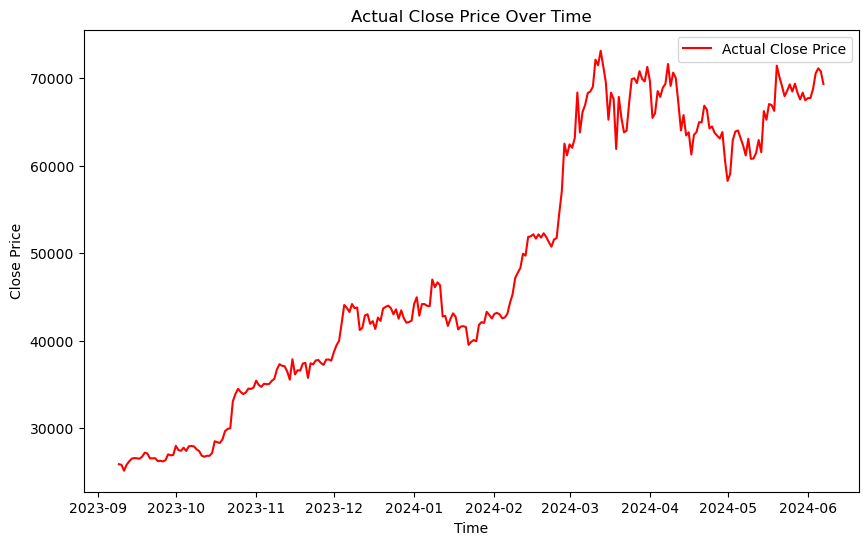

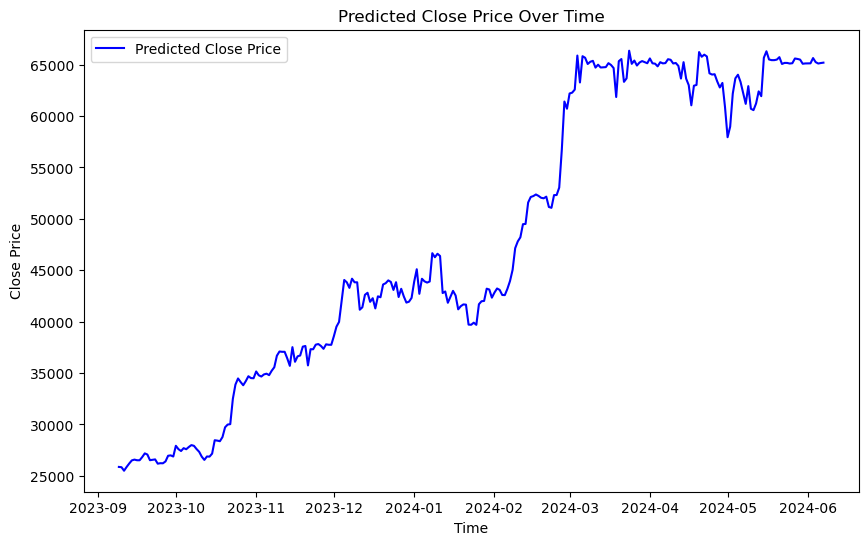

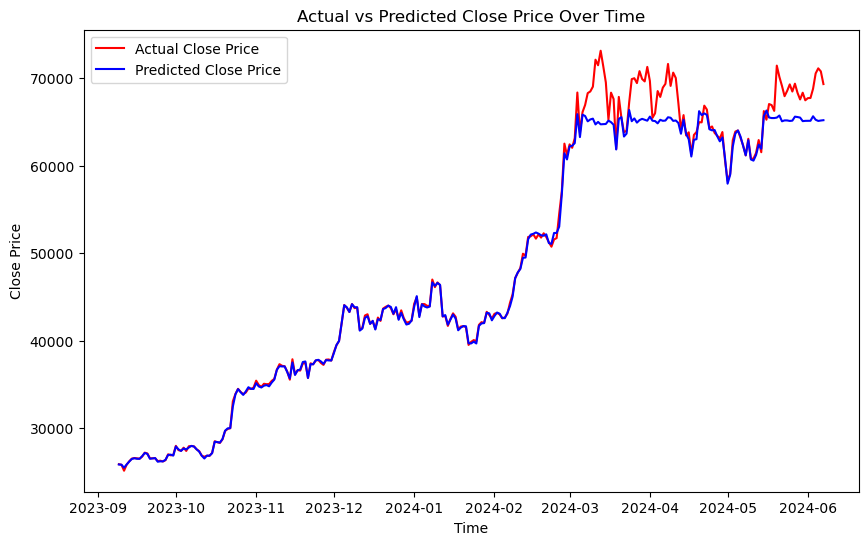

Predicted Close Price for the Next Day: 65198.04296875


In [111]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib

# Step 1: Load Data from CSV (daily data)
file_path = '/Users/noraizabid/Desktop/Dissertation Algos/XGboost/BTC-USD_1d_2021_to_2024_cleaned.csv'
data = pd.read_csv(file_path)

# Convert the time column to datetime (using the correct format)
# Assuming the time column is in 'YYYY-MM-DD' format without time component
data['time'] = pd.to_datetime(data['time'], format='%Y-%m-%d')
data = data.sort_values('time')

# Step 2: Prepare the data for XGBoost
# We will create lag features to predict the next day's 'close' price based on previous 'open', 'high', 'low', 'close', and 'volume' data.

# Creating lag features
for lag in range(1, 8):
    data[f'lag_{lag}_close'] = data['close'].shift(lag)
    data[f'lag_{lag}_open'] = data['open'].shift(lag)
    data[f'lag_{lag}_high'] = data['high'].shift(lag)
    data[f'lag_{lag}_low'] = data['low'].shift(lag)
    data[f'lag_{lag}_volume'] = data['volume'].shift(lag)

# Dropping rows with NaN values that were created due to lagging
data = data.dropna()

# Features and target
X = data.drop(columns=['time'])  # Keep 'close' in the features
y = data['close']  # Target variable (next day's closing price)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=False, random_state=42)

# Step 4: Train XGBoost Model
model = XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=7, subsample=0.8, colsample_bytree=0.8)
model.fit(X_train, y_train)

# Step 5: Make Predictions on the Test Set
y_pred = model.predict(X_test)

# Step 6: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Step 6: Visualization

# 1. Actual Data Plot over time
plt.figure(figsize=(10, 6))
plt.plot(data['time'].iloc[-len(y_test):], y_test, label='Actual Close Price', color='red')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Actual Close Price Over Time')
plt.legend()
plt.show()

# 2. Predicted Data Plot over time
plt.figure(figsize=(10, 6))
plt.plot(data['time'].iloc[-len(y_pred):], y_pred, label='Predicted Close Price', color='blue')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Predicted Close Price Over Time')
plt.legend()
plt.show()

# 3. Combined Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.plot(data['time'].iloc[-len(y_test):], y_test, label='Actual Close Price', color='red')
plt.plot(data['time'].iloc[-len(y_pred):], y_pred, label='Predicted Close Price', color='blue')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price Over Time')
plt.legend()
plt.show()

# Save the model using joblib
model_filename = 'xgboost_model_btc_1d.pkl'
joblib.dump(model, model_filename)

# Step 7: Real-Time Prediction using the last 7 days of data
# Use the last 7 days of the test data for prediction
last_7_days_df = X_test.tail(7).copy()

# Predict the next day's price
next_day_prediction = model.predict(last_7_days_df)
print(f'Predicted Close Price for the Next Day: {next_day_prediction[-1]}')


In [ ]:
btc+eth 1h

Mean Absolute Error: 10.966673723249258
Mean Squared Error: 220.03092257452383
R^2 Score: 0.9995928040322717


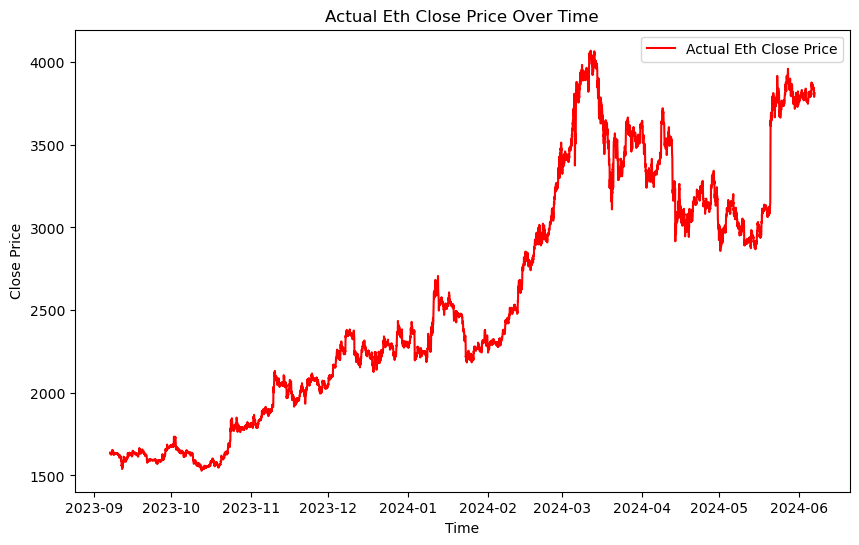

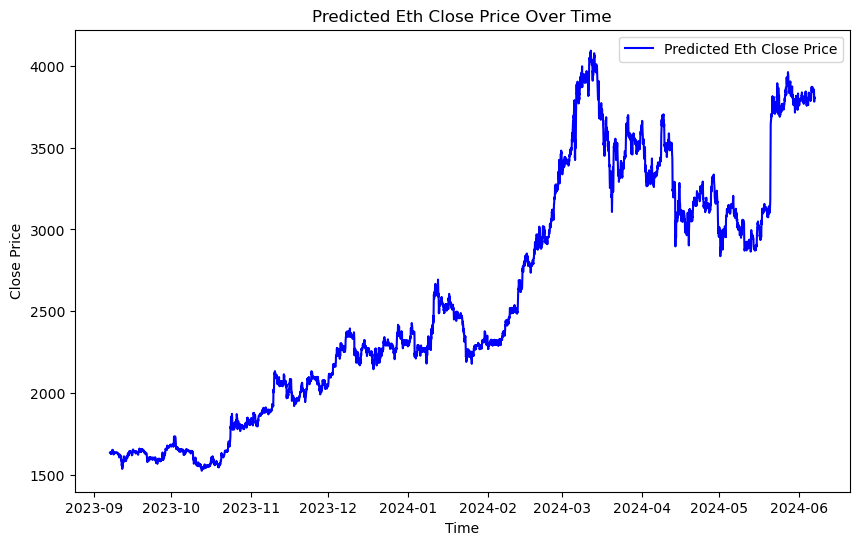

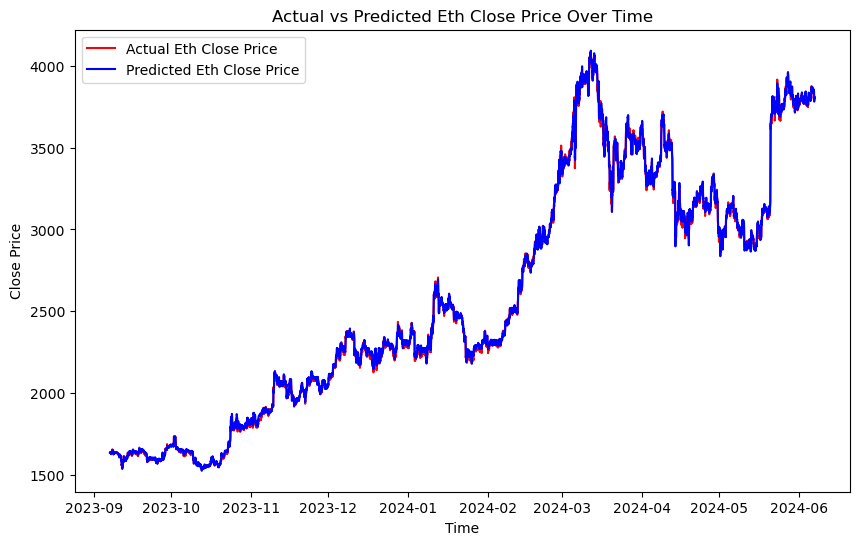

Predicted Eth Close Price for the Next Hour: 3806.670654296875


In [119]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib

# Step 1: Load Data from CSV (hourly data)
file_path = '/Users/noraizabid/Desktop/Dissertation Algos/XGboost/EthBTC1h.csv'  # Replace with the correct path to your CSV file
data = pd.read_csv(file_path)

# Convert the time column to datetime (using the correct format)
data['time'] = pd.to_datetime(data['time'], format='%d/%m/%Y %H:%M')
data = data.sort_values('time')

# Step 2: Prepare the data for XGBoost
# We will create lag features to predict the next hour's 'Eth-close' price based on previous 'Btc-open', 'Btc-high', 'Btc-low', 'Btc-close', 'volume', 'Eth-open', 'Eth-high', 'Eth-low', 'Eth-close', and 'Eth-volume'.

# Creating lag features
for lag in range(1, 8):
    data[f'lag_{lag}_btc_open'] = data['Btc-open'].shift(lag)
    data[f'lag_{lag}_btc_high'] = data['Btc-high'].shift(lag)
    data[f'lag_{lag}_btc_low'] = data['Btc-low'].shift(lag)
    data[f'lag_{lag}_btc_close'] = data['Btc-close'].shift(lag)
    data[f'lag_{lag}_volume'] = data['volume'].shift(lag)
    data[f'lag_{lag}_eth_open'] = data['Eth-open'].shift(lag)
    data[f'lag_{lag}_eth_high'] = data['Eth-high'].shift(lag)
    data[f'lag_{lag}_eth_low'] = data['Eth-low'].shift(lag)
    data[f'lag_{lag}_eth_close'] = data['Eth-close'].shift(lag)
    data[f'lag_{lag}_eth_volume'] = data['Eth-volume'].shift(lag)

# Dropping rows with NaN values that were created due to lagging
data = data.dropna()

# Features and target
X = data.drop(columns=['time', 'Eth-close'])  # Use all columns except 'time' and 'Eth-close' as features
y = data['Eth-close']  # Target variable (next hour's closing price)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=False, random_state=42)

# Step 4: Train XGBoost Model
model = XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=7, subsample=0.8, colsample_bytree=0.8)
model.fit(X_train, y_train)

# Step 5: Make Predictions on the Test Set
y_pred = model.predict(X_test)

# Step 6: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Step 6: Visualization

# 1. Actual Data Plot over time
plt.figure(figsize=(10, 6))
plt.plot(data['time'].iloc[-len(y_test):], y_test, label='Actual Eth Close Price', color='red')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Actual Eth Close Price Over Time')
plt.legend()
plt.show()

# 2. Predicted Data Plot over time
plt.figure(figsize=(10, 6))
plt.plot(data['time'].iloc[-len(y_pred):], y_pred, label='Predicted Eth Close Price', color='blue')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Predicted Eth Close Price Over Time')
plt.legend()
plt.show()

# 3. Combined Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.plot(data['time'].iloc[-len(y_test):], y_test, label='Actual Eth Close Price', color='red')
plt.plot(data['time'].iloc[-len(y_pred):], y_pred, label='Predicted Eth Close Price', color='blue')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Eth Close Price Over Time')
plt.legend()
plt.show()

# Save the model using joblib
model_filename = 'xgboost_model_eth+btc_1h.pkl'
joblib.dump(model, model_filename)

# Step 7: Real-Time Prediction using the last 7 hours of data
# Use the last 7 hours of the test data for prediction
last_7_hours_df = X_test.tail(7).copy()

# Predict the next hour's price
next_hour_prediction = model.predict(last_7_hours_df)
print(f'Predicted Eth Close Price for the Next Hour: {next_hour_prediction[-1]}')


In [ ]:
eth+btc 1d

Mean Absolute Error: 44.9251067958734
Mean Squared Error: 3628.8992339195465
R^2 Score: 0.9932851905988112


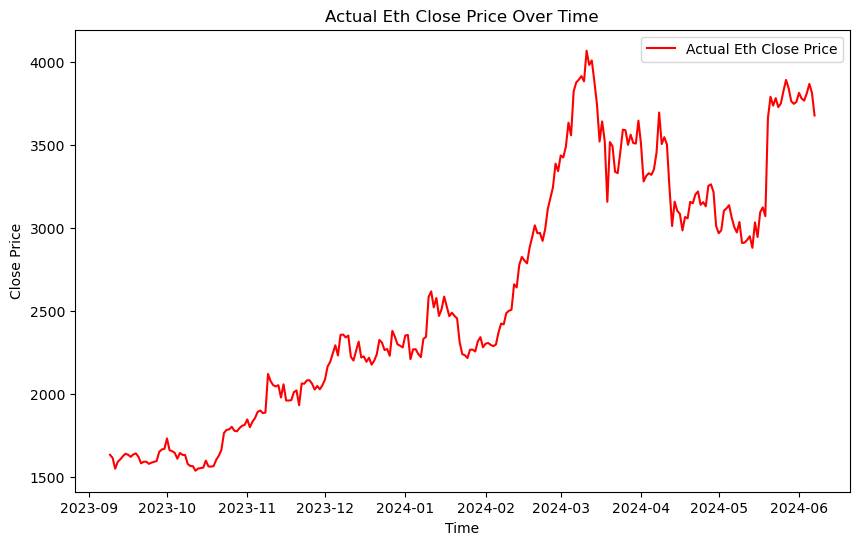

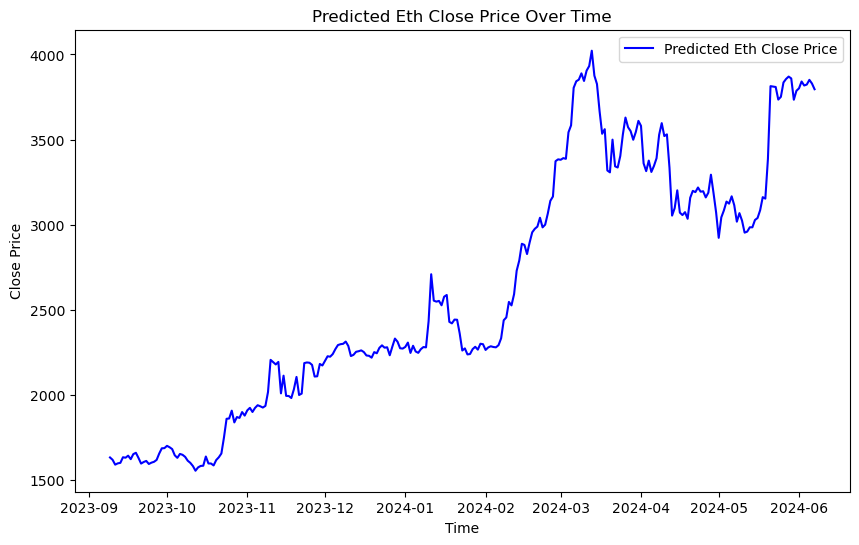

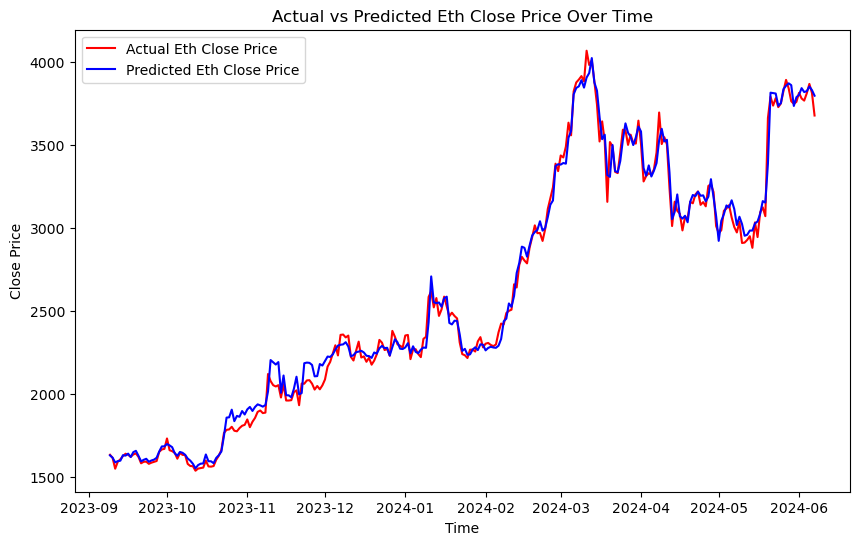

Predicted Eth Close Price for the Next Day: 3795.60400390625


In [123]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib

# Step 1: Load Data from CSV (daily data)
file_path = '/Users/noraizabid//Desktop/Dissertation Algos/XGboost/BTCETH_1D_2024_to_2024.csv'  # Replace with the correct path to your CSV file
data = pd.read_csv(file_path)

# Convert the time column to datetime (using the correct format)
data['time'] = pd.to_datetime(data['time'], format='%d/%m/%Y')
data = data.sort_values('time')

# Step 2: Prepare the data for XGBoost
# We will create lag features to predict the next day's 'Eth-close' price based on previous 'Btc-open', 'Btc-high', 'Btc-low', 'Btc-close', 'Btc-volume', 'Eth-open', 'Eth-high', 'Eth-low', 'Eth-volume', and 'Eth-close'.

# Creating lag features
for lag in range(1, 8):
    data[f'lag_{lag}_btc_open'] = data['Btc-open'].shift(lag)
    data[f'lag_{lag}_btc_high'] = data['Btc-high'].shift(lag)
    data[f'lag_{lag}_btc_low'] = data['Btc-low'].shift(lag)
    data[f'lag_{lag}_btc_close'] = data['Btc-close'].shift(lag)
    data[f'lag_{lag}_btc_volume'] = data['Btc-volume'].shift(lag)
    data[f'lag_{lag}_eth_open'] = data['Eth-open'].shift(lag)
    data[f'lag_{lag}_eth_high'] = data['Eth-high'].shift(lag)
    data[f'lag_{lag}_eth_low'] = data['Eth-low'].shift(lag)
    data[f'lag_{lag}_eth_volume'] = data['Eth-volume'].shift(lag)
    data[f'lag_{lag}_eth_close'] = data['Eth-close'].shift(lag)

# Dropping rows with NaN values that were created due to lagging
data = data.dropna()

# Features and target
X = data.drop(columns=['time', 'Eth-close'])  # Use all columns except 'time' and 'Eth-close' as features
y = data['Eth-close']  # Target variable (next day's closing price)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=False, random_state=42)

# Step 4: Train XGBoost Model
model = XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=7, subsample=0.8, colsample_bytree=0.8)
model.fit(X_train, y_train)

# Step 5: Make Predictions on the Test Set
y_pred = model.predict(X_test)

# Step 6: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Step 6: Visualization

# 1. Actual Data Plot over time
plt.figure(figsize=(10, 6))
plt.plot(data['time'].iloc[-len(y_test):], y_test, label='Actual Eth Close Price', color='red')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Actual Eth Close Price Over Time')
plt.legend()
plt.show()

# 2. Predicted Data Plot over time
plt.figure(figsize=(10, 6))
plt.plot(data['time'].iloc[-len(y_pred):], y_pred, label='Predicted Eth Close Price', color='blue')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Predicted Eth Close Price Over Time')
plt.legend()
plt.show()

# 3. Combined Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.plot(data['time'].iloc[-len(y_test):], y_test, label='Actual Eth Close Price', color='red')
plt.plot(data['time'].iloc[-len(y_pred):], y_pred, label='Predicted Eth Close Price', color='blue')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Eth Close Price Over Time')
plt.legend()
plt.show()

# Save the model using joblib
model_filename = 'xgboost_model_eth+btc_1d.pkl'
joblib.dump(model, model_filename)

# Step 7: Real-Time Prediction using the last 7 days of data
# Use the last 7 days of the test data for prediction
last_7_days_df = X_test.tail(7).copy()

# Predict the next day's price
next_day_prediction = model.predict(last_7_days_df)
print(f'Predicted Eth Close Price for the Next Day: {next_day_prediction[-1]}')


/var/folders/vh/dtggx3r952jcm810kxqjcpfh0000gn/T/ipykernel_80096/3750593100.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}_{col}'] = data[col].shift(lag)
/var/folders/vh/dtggx3r952jcm810kxqjcpfh0000gn/T/ipykernel_80096/3750593100.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}_{col}'] = data[col].shift(lag)
/var/folders/vh/dtggx3r952jcm810kxqjcpfh0000gn/T/ipykernel_80096/3750593100.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame


XGBoost_BTC_1h Training Metrics:
Train MAE: 12.0123, Train MSE: 254.0576, Train R²: 1.0000

XGBoost_BTC_1h Testing Metrics:
Test MAE: 500.9908, Test MSE: 1421786.5725, Test R²: 0.9938


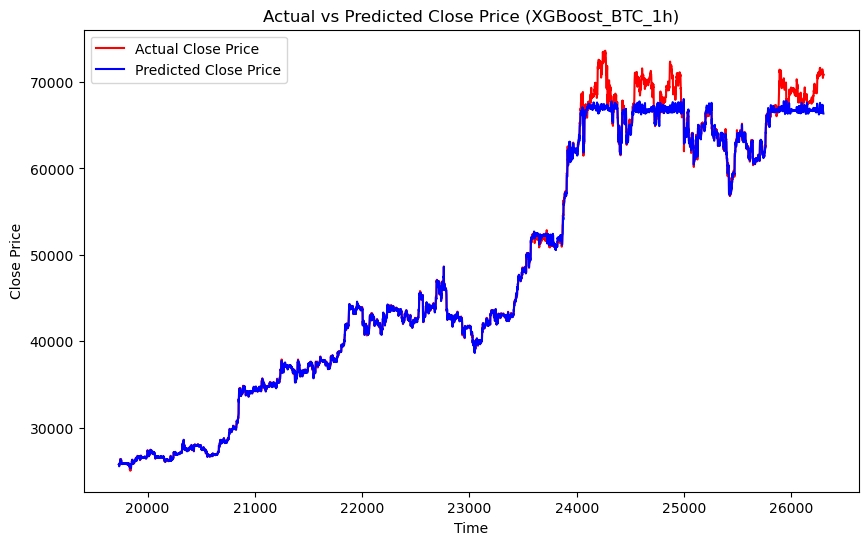

/var/folders/vh/dtggx3r952jcm810kxqjcpfh0000gn/T/ipykernel_80096/3750593100.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}_{col}'] = data[col].shift(lag)
/var/folders/vh/dtggx3r952jcm810kxqjcpfh0000gn/T/ipykernel_80096/3750593100.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}_{col}'] = data[col].shift(lag)
/var/folders/vh/dtggx3r952jcm810kxqjcpfh0000gn/T/ipykernel_80096/3750593100.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame


XGBoost_ETH_1h Training Metrics:
Train MAE: 0.8857, Train MSE: 1.3971, Train R²: 1.0000

XGBoost_ETH_1h Testing Metrics:
Test MAE: 4.7211, Test MSE: 49.5352, Test R²: 0.9999


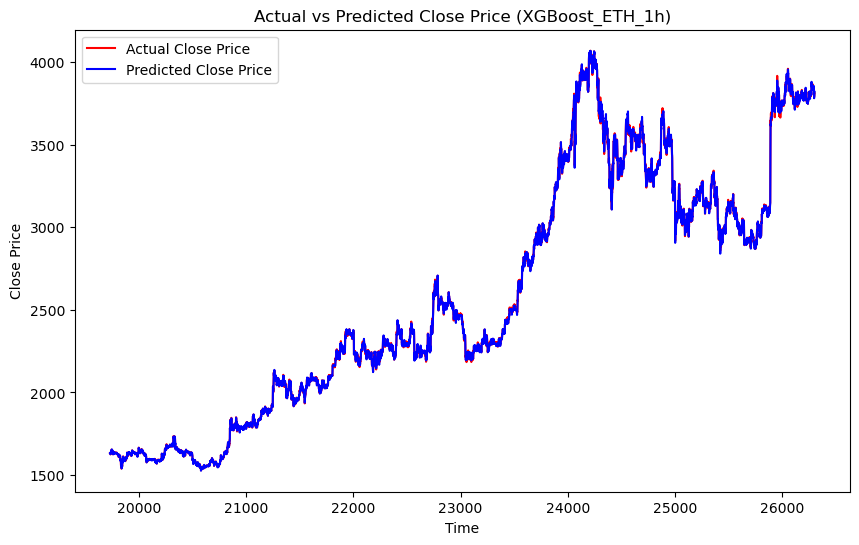

/var/folders/vh/dtggx3r952jcm810kxqjcpfh0000gn/T/ipykernel_80096/3750593100.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}_{col}'] = data[col].shift(lag)
/var/folders/vh/dtggx3r952jcm810kxqjcpfh0000gn/T/ipykernel_80096/3750593100.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}_{col}'] = data[col].shift(lag)
/var/folders/vh/dtggx3r952jcm810kxqjcpfh0000gn/T/ipykernel_80096/3750593100.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame


XGBoost_ETH+BTC_1h Training Metrics:
Train MAE: 1.6191, Train MSE: 4.5928, Train R²: 1.0000

XGBoost_ETH+BTC_1h Testing Metrics:
Test MAE: 10.9825, Test MSE: 227.8541, Test R²: 0.9996


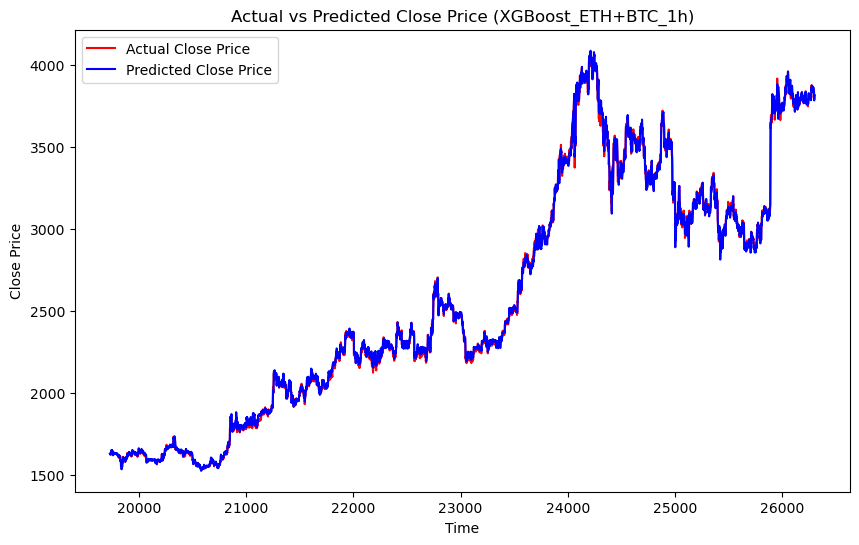

/var/folders/vh/dtggx3r952jcm810kxqjcpfh0000gn/T/ipykernel_80096/3750593100.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}_{col}'] = data[col].shift(lag)
/var/folders/vh/dtggx3r952jcm810kxqjcpfh0000gn/T/ipykernel_80096/3750593100.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}_{col}'] = data[col].shift(lag)
/var/folders/vh/dtggx3r952jcm810kxqjcpfh0000gn/T/ipykernel_80096/3750593100.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame


XGBoost_BTC_1d Training Metrics:
Train MAE: 0.0203, Train MSE: 0.0006, Train R²: 1.0000

XGBoost_BTC_1d Testing Metrics:
Test MAE: 868.2027, Test MSE: 2900258.8967, Test R²: 0.9869


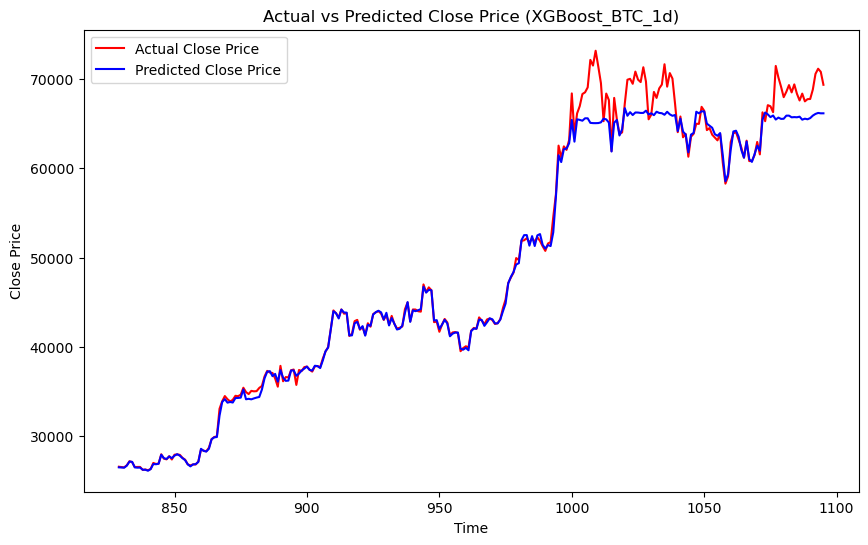

/var/folders/vh/dtggx3r952jcm810kxqjcpfh0000gn/T/ipykernel_80096/3750593100.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}_{col}'] = data[col].shift(lag)
/var/folders/vh/dtggx3r952jcm810kxqjcpfh0000gn/T/ipykernel_80096/3750593100.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}_{col}'] = data[col].shift(lag)
/var/folders/vh/dtggx3r952jcm810kxqjcpfh0000gn/T/ipykernel_80096/3750593100.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame


XGBoost_ETH_1d Training Metrics:
Train MAE: 0.0018, Train MSE: 0.0000, Train R²: 1.0000

XGBoost_ETH_1d Testing Metrics:
Test MAE: 17.4289, Test MSE: 603.4388, Test R²: 0.9989


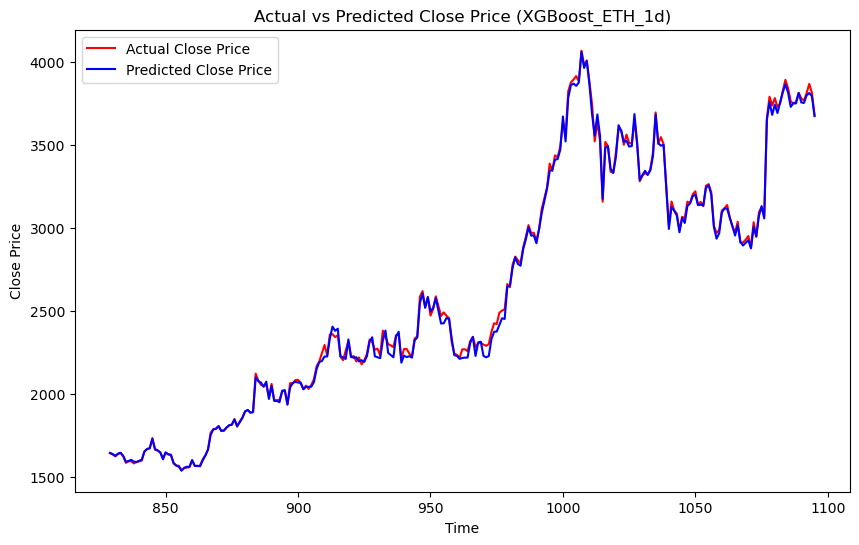

/var/folders/vh/dtggx3r952jcm810kxqjcpfh0000gn/T/ipykernel_80096/3750593100.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}_{col}'] = data[col].shift(lag)
/var/folders/vh/dtggx3r952jcm810kxqjcpfh0000gn/T/ipykernel_80096/3750593100.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'lag_{lag}_{col}'] = data[col].shift(lag)
/var/folders/vh/dtggx3r952jcm810kxqjcpfh0000gn/T/ipykernel_80096/3750593100.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

KeyboardInterrupt: 

In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib

def load_and_prepare_data(file_path, time_format, target_column, drop_columns=[]):
    # Load the data
    data = pd.read_csv(file_path)
    # Convert time column to datetime
    data['time'] = pd.to_datetime(data['time'], format=time_format)
    data = data.sort_values('time')
    
    # Create lag features
    for lag in range(1, 8):
        for col in data.columns:
            if col != 'time' and col not in drop_columns:
                data[f'lag_{lag}_{col}'] = data[col].shift(lag)
    
    # Drop rows with NaN values
    data = data.dropna()

    # Define features (X) and target (y)
    X = data.drop(columns=['time'] + drop_columns)
    y = data[target_column]
    
    return X, y, data

def train_and_evaluate(X, y, model_name):
    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=False, random_state=42)
    
    # Train XGBoost Model
    model = XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=7, subsample=0.8, colsample_bytree=0.8)
    model.fit(X_train, y_train)

    # Make predictions on both training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate the model
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"\n{model_name} Training Metrics:")
    print(f'Train MAE: {train_mae:.4f}, Train MSE: {train_mse:.4f}, Train R²: {train_r2:.4f}')
    
    print(f"\n{model_name} Testing Metrics:")
    print(f'Test MAE: {test_mae:.4f}, Test MSE: {test_mse:.4f}, Test R²: {test_r2:.4f}')

    # Save the model
    joblib.dump(model, f'{model_name}.pkl')
    
    # Visualization
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.index, y_test, label='Actual Close Price', color='red')
    plt.plot(y_test.index, y_test_pred, label='Predicted Close Price', color='blue')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.title(f'Actual vs Predicted Close Price ({model_name})')
    plt.legend()
    plt.show()

# 1-hour BTC Prediction
btc_1h_path = '/Users/noraizabid/Desktop/Dissertation Algos/XGboost/BTCUSD_1h_2021_to_2024_cleaned.csv'
X_btc_1h, y_btc_1h, _ = load_and_prepare_data(btc_1h_path, '%Y-%m-%d %H:%M:%S', target_column='close')
train_and_evaluate(X_btc_1h, y_btc_1h, 'XGBoost_BTC_1h')

# 1-hour ETH Prediction
eth_1h_path = '/Users/noraizabid/Desktop/Dissertation Algos/XGboost/ETHUSD_1h_2021_to_2024_cleaned.csv'
X_eth_1h, y_eth_1h, _ = load_and_prepare_data(eth_1h_path, '%d/%m/%Y %H:%M', target_column='close')
train_and_evaluate(X_eth_1h, y_eth_1h, 'XGBoost_ETH_1h')

# 1-hour ETH Prediction using Merged BTC+ETH Features
merged_1h_path = '/Users/noraizabid/Desktop/Dissertation Algos/XGboost/EthBTC1h.csv'
X_merged_1h, y_merged_1h, _ = load_and_prepare_data(merged_1h_path, '%d/%m/%Y %H:%M', target_column='Eth-close', drop_columns=['Eth-close'])
train_and_evaluate(X_merged_1h, y_merged_1h, 'XGBoost_ETH+BTC_1h')

# 1-day BTC Prediction
btc_1d_path = '/Users/noraizabid/Desktop/Dissertation Algos/XGboost/BTC-USD_1d_2021_to_2024_cleaned.csv'
X_btc_1d, y_btc_1d, _ = load_and_prepare_data(btc_1d_path, '%Y-%m-%d', target_column='close')
train_and_evaluate(X_btc_1d, y_btc_1d, 'XGBoost_BTC_1d')

# 1-day ETH Prediction
eth_1d_path = '/Users/noraizabid/Desktop/Dissertation Algos/XGboost/ETH-USD_1d_2021_to_2024_cleaned.csv'
X_eth_1d, y_eth_1d, _ = load_and_prepare_data(eth_1d_path, '%Y-%m-%d', target_column='close')
train_and_evaluate(X_eth_1d, y_eth_1d, 'XGBoost_ETH_1d')

# 1-day ETH Prediction using Merged BTC+ETH Features
merged_1d_path = '/Users/noraizabid/Desktop/Dissertation Algos/XGboost/BTCETH_1D_2024_to_2024.csv'
X_merged_1d, y_merged_1d, _ = load_and_prepare_data(merged_1d_path, '%d/%m/%Y', target_column='Eth-close', drop_columns=['Eth-close'])
train_and_evaluate(X_merged_1d, y_merged_1d, 'XGBoost_ETH+BTC_1d')
